In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
### Latex font in plots
plt.rcParams['font.serif'] = "cmr10"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24

plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.grid"] = True
# plt.rcParams['text.usetex'] = True
plt.rc('axes', unicode_minus=False)


In [3]:
# Load the CSV file to examine its structure
file_path = '../data/k-barrier-tuning/test-data/first-half-year-experiment.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,runname,Air Temperature,CO2 concentration,Humidity,Fruit weight,Fruit harvest,PAR,CO2 resource,Gas resource,Time,Cumulative harvest,Cumulative CO2,Cumulative gas,Cumulative profit,Cumulative violations,Humidity > 85
0,silvery-eon-22,16.500000,417.438290,90.000000,0.280000,-1.020294e-12,0.000001,2.975659e-11,-5.711019e-11,1298934000000,-1.020294e-12,2.975659e-11,-5.711019e-11,-0.001539,-0.546010,True
1,silvery-eon-22,15.225690,777.268612,96.560966,0.279980,4.459179e-07,0.000001,2.568980e-03,3.696682e-03,1298934900000,4.459169e-07,2.568980e-03,3.696682e-03,-0.003014,-0.832130,True
2,silvery-eon-22,17.850490,966.039347,89.823613,0.279963,4.381947e-07,36.968576,1.918891e-03,3.696682e-03,1298935800000,8.841116e-07,4.487871e-03,7.393365e-03,-0.004300,-1.106405,True
3,silvery-eon-22,19.297887,883.851976,89.596258,0.279964,4.342577e-07,36.968576,3.540207e-05,3.696682e-03,1298936700000,1.318369e-06,4.523273e-03,1.109005e-02,-0.005584,-1.324390,True
4,silvery-eon-22,18.958850,789.378000,88.564513,0.280009,4.426762e-07,36.968576,1.315722e-05,3.696682e-03,1298937600000,1.761046e-06,4.536431e-03,1.478673e-02,-0.006924,-1.515772,True


In [4]:

# Convert 'Time' to readable datetime format
data['Date'] = pd.to_datetime(data['Time'], unit='ms')
data['Date'] = data['Date'].apply(lambda t: t+timedelta(hours=1))


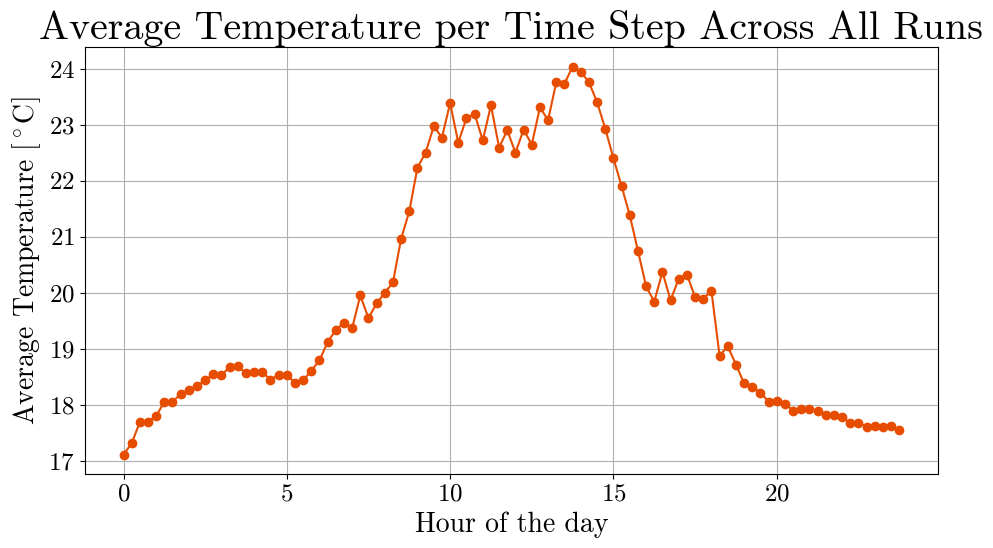

In [5]:

# Extract time of day from the 'Date' column
data['TimeOfDay'] = data['Date'].dt.time

# Group by time of day and calculate the mean temperature for each time step across all runs
time_step_means = data.groupby('TimeOfDay')['Air Temperature'].mean().reset_index()

# Convert 'TimeOfDay' to minutes past midnight for plotting
time_step_means['MinutesPastMidnight'] = time_step_means['TimeOfDay'].apply(lambda t: t.hour + t.minute/60)

# Plotting with the modified time format
plt.figure(figsize=(10, 6))
plt.plot(time_step_means['MinutesPastMidnight'], time_step_means['Air Temperature'], marker='o', linestyle='-', color=(0.9, .3, 0))
plt.title('Average Temperature per Time Step Across All Runs')
plt.xlabel('Hour of the day')
plt.ylabel(r'Average Temperature [$^\circ$C]')
plt.grid(True)
plt.tight_layout()

plt.show()

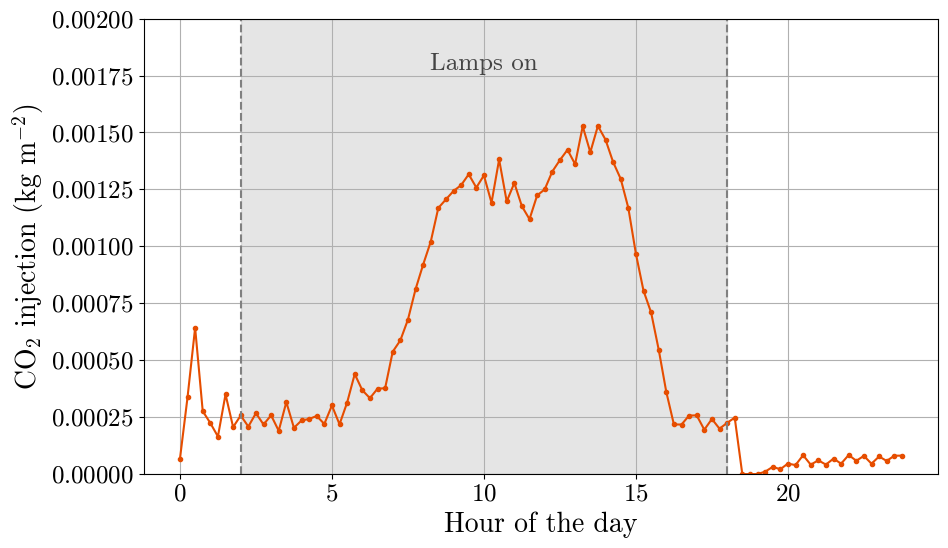

In [12]:
# Group by time of day and calculate the mean CO2 resource usage for each time step across all runs
co2_resource_means = data.groupby('TimeOfDay')['CO2 resource'].mean().reset_index()

# Adjust 'TimeOfDay' by adding one hour for UTC+1
# co2_resource_means['TimeOfDayUTC+1'] = co2_resource_means['TimeOfDay'].apply(lambda t: (datetime.combine(datetime.today(), t) + timedelta(hours=1)).time())

# Convert 'TimeOfDayUTC+1' to hours past midnight for plotting
co2_resource_means['HoursPastMidnightUTC+1'] = co2_resource_means['TimeOfDay'].apply(lambda t: t.hour + t.minute / 60)

# Plotting the CO2 resource usage against hours past midnight (UTC+1)
plt.figure(figsize=(10, 6))
plt.plot(co2_resource_means['HoursPastMidnightUTC+1'], co2_resource_means['CO2 resource'], marker='o', markersize=3, linestyle='-', color=(0.9, .3, 0))
# plt.title('Average CO2 Resource Usage per Time Step Across All Runs (UTC+1)')

plt.vlines(18, ymin=0, ymax=0.002, linestyle="--", color='gray')
plt.vlines(2, ymin=0, ymax=0.002, linestyle="--", color='gray')
plt.ylim(0, 0.002)
# Filling the area between 02:00 and 18:00 with a lighter gray color
plt.fill_betweenx([plt.ylim()[0], plt.ylim()[1]], 2, 18, color='gray', alpha=0.2)

middle_point = (2 + 18) / 2
plt.text(middle_point, plt.ylim()[1]*0.9, 'Lamps on', horizontalalignment='center', verticalalignment='center', fontsize=18, color='black', alpha=0.7)
plt.xlabel('Hour of the day')
plt.ylabel(r'CO$_2$ injection (kg m$^{-2}$)')

plt.grid(True)
plt.tight_layout()
plt.savefig('co2_injection.svg')
plt.show()

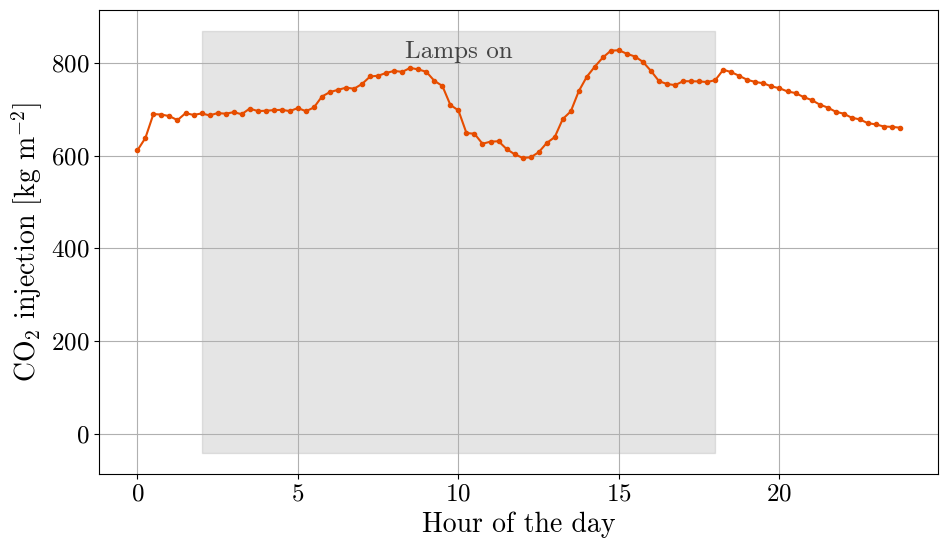

In [10]:
# Group by time of day and calculate the mean CO2 resource usage for each time step across all runs
co2_resource_means = data.groupby('TimeOfDay')['CO2 concentration'].mean().reset_index()

# Adjust 'TimeOfDay' by adding one hour for UTC+1
# co2_resource_means['TimeOfDayUTC+1'] = co2_resource_means['TimeOfDay'].apply(lambda t: (datetime.combine(datetime.today(), t) + timedelta(hours=1)).time())

# Convert 'TimeOfDayUTC+1' to hours past midnight for plotting
co2_resource_means['HoursPastMidnightUTC+1'] = co2_resource_means['TimeOfDay'].apply(lambda t: t.hour + t.minute / 60)

# Plotting the CO2 resource usage against hours past midnight (UTC+1)
plt.figure(figsize=(10, 6))
plt.plot(co2_resource_means['HoursPastMidnightUTC+1'], co2_resource_means['CO2 concentration'], marker='o', markersize=3, linestyle='-', color=(0.9, .3, 0))
# plt.title('Average CO2 Resource Usage per Time Step Across All Runs (UTC+1)')

plt.vlines(18, ymin=0, ymax=0.002, linestyle="--", color='gray')
plt.vlines(2, ymin=0, ymax=0.002, linestyle="--", color='gray')
# plt.ylim(0, 0.002)
# Filling the area between 02:00 and 18:00 with a lighter gray color
plt.fill_betweenx([plt.ylim()[0], plt.ylim()[1]], 2, 18, color='gray', alpha=0.2)

middle_point = (2 + 18) / 2
plt.text(middle_point, plt.ylim()[1]*0.9, 'Lamps on', horizontalalignment='center', verticalalignment='center', fontsize=18, color='black', alpha=0.7)
plt.xlabel('Hour of the day')
plt.ylabel(r'CO$_2$ injection [kg m$^{-2}$]')

# plt.grid(True)
plt.tight_layout()
plt.savefig('co2_injection.svg')
plt.show()